# Auto-activation

Example of a self-activating transcriptional system where $x_1$ is the mRNA and $x_2$ is the protein:

$$
\frac{d x_1}{dt} = \alpha \frac{x_2^n}{K + x_2^n} - \beta x_1\\
\frac{d x_2}{dt} = \gamma x_1 - \delta x_2
$$



LastLastThe null-clines of this system are:

$$
 x_1 = \frac{\alpha}{\beta}\frac{x_2^n}{K + x_2^n} \\
 x_1 = \frac{\delta}{\gamma} x_2
$$

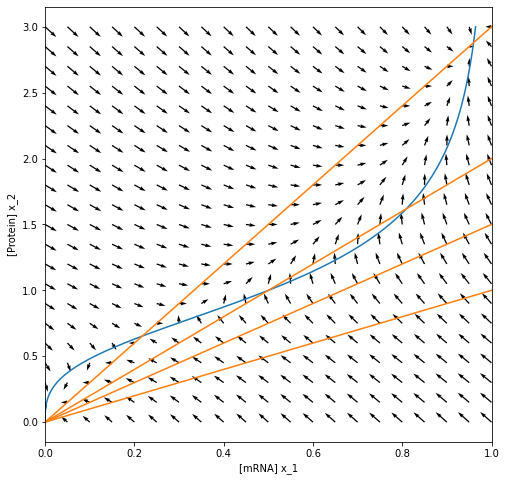

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def dxdt(x,t, a,b,c,d,K,n):
    # x = [x_1, x_2]  ==> x[0] == x_1 and x[1] == x_2
    x_1, x_2 = x[0], x[1]
    dx_1 = a*x_2**n/(K+x_2**n) - b*x_1
    dx_2 = c*x_1 - d*x_2
    return [dx_1, dx_2]

b=1
d=1
a=1
c=3
K=1
n=3

plt.figure(figsize=(8,8))
x_2 = np.linspace(0,3,101)
plt.plot(a/b*x_2**n/(K+x_2**n), x_2)
for d  in [1, 1.5, 2, 3]:
    plt.plot(d/c*x_2, x_2, c='C1')
plt.xlabel('[mRNA] x_1')
plt.ylabel('[Protein] x_2')
plt.xlim(0,1)
d=1
grid = np.meshgrid(np.linspace(0,1,21), np.linspace(0,3,21))
arrows = dxdt(grid,0, a,b,c,d,K,n)
arrow_length = np.sqrt(arrows[0]**2 + arrows[1]**2)+1e-10
plt.quiver(grid[0], grid[1], arrows[0]/arrow_length**0.8, arrows[1]/arrow_length**0.8, angles='xy')

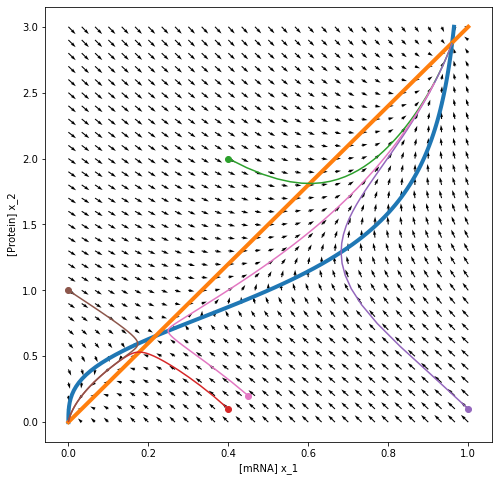

In [2]:
plt.figure(figsize=(8,8))
plt.plot(a/b*x_2**n/(K+x_2**n), x_2, lw=4)
plt.plot(d/c*x_2, x_2, lw=4)
plt.xlabel('[mRNA] x_1')
plt.ylabel('[Protein] x_2')

t = np.linspace(0,10,101)

grid = np.meshgrid(np.linspace(0,1,31), np.linspace(0,3,31))
arrows = dxdt(grid,0, a,b,c,d,K,n)
arrow_length = np.sqrt(arrows[0]**2 + arrows[1]**2)+1e-10
plt.quiver(grid[0], grid[1], arrows[0]/arrow_length**0.8, arrows[1]/arrow_length**0.8, angles='xy')

x0 = [0.4, 2.0]
sol = odeint(dxdt, x0, t, args=(a,b,c,d,K,n))
plt.scatter([x0[0]], [x0[1]], c="C2")
plt.plot(sol[:,0], sol[:,1], c="C2")


x0 = [0.4, 0.1]
sol = odeint(dxdt, x0, t, args=(a,b,c,d,K,n))
plt.scatter([x0[0]], [x0[1]], c="C3")
plt.plot(sol[:,0], sol[:,1], c="C3")

x0 = [1.0, 0.1]
sol = odeint(dxdt, x0, t, args=(a,b,c,d,K,n))
plt.scatter([x0[0]], [x0[1]], c="C4")
plt.plot(sol[:,0], sol[:,1], c="C4")


x0 = [0.0, 1.0]
sol = odeint(dxdt, x0, t, args=(a,b,c,d,K,n))
plt.scatter([x0[0]], [x0[1]], c="C5")
plt.plot(sol[:,0], sol[:,1], c="C5")


x0 = [0.45, 0.2]
sol = odeint(dxdt, x0, t, args=(a,b,c,d,K,n))
plt.scatter([x0[0]], [x0[1]], c="C6")
plt.plot(sol[:,0], sol[:,1], c="C6")


The above example is a case of self-activation:
 * the protein at concentration $x_2$ increases transcription
 * mRNA $x_1$ translates into protein $x_2$
 * both quantities decay
 
This behavior results in three fixed points:
 * A stable fixed point at (0,0): no protein, no transcription and no mRNA, no translation
 * A stable fixed point at $\approx (1, 2.9)$: degradation and production balance each other for both mRNA and protein
 * An unstable fixed point around $(0.2,0.6)$: marks the point at which the system either goes to (0,0) or the high fixed point. 

### Self-repression

Next, we will discuss another useful example of gene regulation: auto-repression.
The system of ODEs for this case is:

Example of a self-activating transcriptional system where $x_1$ is the mRNA and $x_2$ is the protein:

$$
\frac{d x_1}{dt} = \alpha \frac{K}{K + x_2^n} - \beta x_1\\
\frac{d x_2}{dt} = \gamma x_1 - \delta x_2
$$

and the corresponding null-clines are 

$$
 x_1 = \frac{\alpha}{\beta}\frac{K}{K + x_2^n} \\
 x_1 = \frac{\delta}{\gamma} x_2
$$


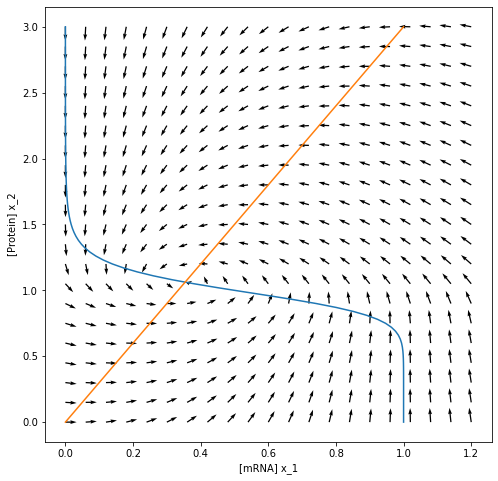

In [3]:
def dxdt(x,t, a,b,c,d,K,n):
    return [a*K/(K+x[1]**n) - b*x[0], c*x[0] - d*x[1]]

x_2 = np.linspace(0,3,101)

b=1
d=1
a=1
c=3
K=1
n=10

plt.figure(figsize=(8,8))
plt.plot(a/b*K/(K+x_2**n), x_2)
plt.plot(d/c*x_2, x_2)
plt.xlabel('[mRNA] x_1')
plt.ylabel('[Protein] x_2')

grid = np.meshgrid(np.linspace(0,1.2,21), np.linspace(0,3,21))
arrows = dxdt(grid,0, a,b,c,d,K,n)
arrow_length = np.sqrt(arrows[0]**2 + arrows[1]**2)+1e-10
plt.quiver(grid[0], grid[1], arrows[0]/arrow_length**0.8, arrows[1]/arrow_length**0.8, angles='xy')

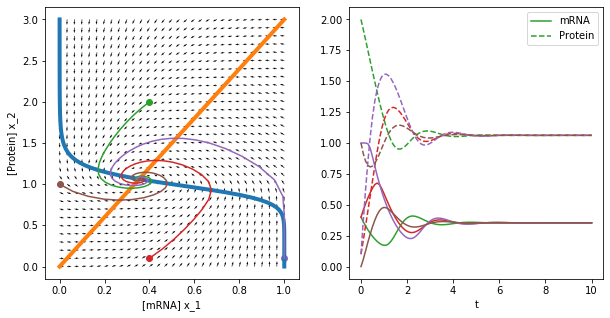

In [4]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].plot(a/b*K/(K+x_2**n), x_2, lw=4)
axs[0].plot(d/c*x_2, x_2, lw=4)
axs[0].set_xlabel('[mRNA] x_1')
axs[0].set_ylabel('[Protein] x_2')

grid = np.meshgrid(np.linspace(0,1,31), np.linspace(0,3,31))
arrows = dxdt(grid,0, a,b,c,d,K,n)
arrow_length = np.sqrt(arrows[0]**2 + arrows[1]**2)+1e-10
axs[0].quiver(grid[0], grid[1], arrows[0]/arrow_length**0.8, arrows[1]/arrow_length**0.8, angles='xy')

x0 = [0.4, 2.0]
sol = odeint(dxdt, x0, t, args=(a,b,c,d,K,n))
axs[0].scatter([x0[0]], [x0[1]], c="C2")
axs[0].plot(sol[:,0], sol[:,1], c="C2")
axs[1].plot(t, sol[:,0], c="C2", label="mRNA")
axs[1].plot(t, sol[:,1], c="C2", ls='--', label="Protein")


x0 = [0.4, 0.1]
sol = odeint(dxdt, x0, t, args=(a,b,c,d,K,n))
axs[0].scatter([x0[0]], [x0[1]], c="C3")
axs[0].plot(sol[:,0], sol[:,1], c="C3")
axs[1].plot(t, sol[:,0], c="C3")
axs[1].plot(t, sol[:,1], c="C3", ls='--')

x0 = [1.0, 0.1]
sol = odeint(dxdt, x0, t, args=(a,b,c,d,K,n))
axs[0].scatter([x0[0]], [x0[1]], c="C4")
axs[0].plot(sol[:,0], sol[:,1], c="C4")
axs[1].plot(t, sol[:,0], c="C4")
axs[1].plot(t, sol[:,1], c="C4", ls='--')


x0 = [0.0, 1.0]
sol = odeint(dxdt, x0, t, args=(a,b,c,d,K,n))
axs[0].scatter([x0[0]], [x0[1]], c="C5")
axs[0].plot(sol[:,0], sol[:,1], c="C5")
axs[1].plot(t, sol[:,0], c="C5")
axs[1].plot(t, sol[:,1], c="C5", ls='--')

axs[1].set_xlabel('t')
axs[1].legend()


### Dig deeper

 * Chance the cooperativity parameter $n$ of the repressor (range 1 to 20). How does the behavior of the system change?
 * Solve the system with the forward Euler approach that we used in the beginning of the course? (You should see the same behavior)
 * Explore how stochasticity chances the dynamics of the auto-repressor! (use the forward Euler way of solving it and implement stochastic increments)